In [310]:
from pycoingecko import CoinGeckoAPI
import datetime
import pytz         # Modulo necesario para que tome la hora UTC
from copy import deepcopy           # Para copiar listas de listas sin modificar la original
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(palette = "pastel")

In [ ]:
# Instancia del modulo de Coin Gecko para hacer consultas
cg = CoinGeckoAPI()

In [14]:
# Funcion de prueba, para corroborar el funcionamiento
def get_prices(coin_ids: str, vs_currencies: str):
    prices = cg.get_price(ids = coin_ids, vs_currencies = vs_currencies)
    return prices

In [15]:
get_prices(['bitcoin', 'ethereum'], ['usd'])

{'bitcoin': {'usd': 25974}, 'ethereum': {'usd': 1645.61}}

In [25]:
# Con la petición "coins_markets" obtenemos las monedas ordenadas por market_cap
coins = cg.get_coins_markets(vs_currency = 'usd')

In [40]:
# Nos quedamos con las 10 de mejor capitalización de mercado al día de la fecha
top_10_market_cap = coins[0:10]

In [47]:
type(top_10_market_cap[0])  # Es una lista de diccionarios

dict

In [52]:
# Extraemos los simbolos de las cripto para poder extraer informacion relativa
cripto_ids = list()
for cripto in top_10_market_cap:
    cripto_ids.append(cripto['id'])

In [53]:
# Nuestra lista de 10 criptos para hacer el análisis exploratorio de los datos
cripto_ids

['bitcoin',
 'ethereum',
 'tether',
 'binancecoin',
 'ripple',
 'usd-coin',
 'staked-ether',
 'cardano',
 'dogecoin',
 'solana']

Nuestro cliente tiene completo desconocimiento del mundo de las criptomonedas y nosotros estamos interiorizándonos. Vamos a hacer un análisis profundo de cada cripto para tratar de establecer tendencias en el tiempo. Elegimos un período de 10 años.

#### ETL de las criptomonedas elegidas

In [202]:
# Fecha de ayer
fecha_actual = datetime.datetime.now()

# Hace 10 años
fecha_hace_10_anios = fecha_actual - datetime.timedelta(days = 10 * 365)

# Convertimos ambas fechas a UNIX Timestamp
fecha_actual = int(fecha_actual.timestamp())
fecha_hace_10_anios = int(fecha_hace_10_anios.timestamp())

In [176]:
bitcoin = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', vs_currency = 'usd', from_timestamp = fecha_hace_10_anios, 
                                                     to_timestamp = fecha_ayer, precision = 2, localization = False)

In [134]:
# Vemos qué keys nos trajo la función
bitcoin.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [177]:
bitcoin_price = deepcopy(bitcoin['prices'])
bitcoin_price       # Vemos que es una lista de listas. El primer valor de cada una es UNIX timestamp en milisegundos

[[1377388800000, 122.0],
 [1377475200000, 122.04],
 [1377561600000, 125.67],
 [1377648000000, 123.02],
 [1377734400000, 123.44],
 [1377820800000, 129.2],
 [1377907200000, 137.76],
 [1377993600000, 138.17],
 [1378080000000, 137.17],
 [1378166400000, 137.51],
 [1378252800000, 135.21],
 [1378339200000, 129.96],
 [1378425600000, 126.13],
 [1378512000000, 123.73],
 [1378598400000, 121.77],
 [1378684800000, 126.4],
 [1378771200000, 127.78],
 [1378857600000, 131.65],
 [1378944000000, 134.22],
 [1379030400000, 135.05],
 [1379116800000, 131.39],
 [1379203200000, 129.95],
 [1379289600000, 131.48],
 [1379376000000, 131.31],
 [1379462400000, 132.06],
 [1379548800000, 130.23],
 [1379635200000, 128.57],
 [1379721600000, 126.78],
 [1379808000000, 128.37],
 [1379894400000, 126.73],
 [1379980800000, 126.09],
 [1380067200000, 127.99],
 [1380153600000, 128.02],
 [1380240000000, 131.84],
 [1380326400000, 133.93],
 [1380412800000, 140.28],
 [1380499200000, 131.65],
 [1380585600000, 132.55],
 [1380672000000

In [121]:
# Función para convertir UNIX timestamp en milisegundos a objeto datetime
def unix_timestamp_to_datetime(unix_timestamp_ms):
    utc = pytz.timezone('UTC')
    dt_utc = datetime.datetime.fromtimestamp(unix_timestamp_ms/1000.0, tz = utc)
    return dt_utc.date()

In [142]:
# De una lista de listas con una columna UNIX timestamp, convertimos a datetime
def lista_unix_to_datetime(lista_unix):
    for lista in lista_unix:
        lista[0] = unix_timestamp_to_datetime(lista[0])
    return lista_unix

In [178]:
bitcoin_price = lista_unix_to_datetime(bitcoin_price)

In [179]:
bitcoin_price = pd.DataFrame(bitcoin_price, columns = ['Fecha', 'Precio'])

In [180]:
# Hacemos lo mismo para los datos que faltan (market_cap y volume)
bitcoin_market_cap = deepcopy(bitcoin['market_caps'])
bitcoin_market_cap = lista_unix_to_datetime(bitcoin_market_cap)
bitcoin_market_cap = pd.DataFrame(bitcoin_market_cap, columns = ['Fecha', 'Market_cap'])

bitcoin_total_volume = deepcopy(bitcoin['total_volumes'])
bitcoin_total_volume = lista_unix_to_datetime(bitcoin_total_volume)
bitcoin_total_volume = pd.DataFrame(bitcoin_total_volume, columns = ['Fecha', 'Total_volume'])

In [183]:
bitcoin_market_cap

,Fecha,Market_cap
0,2013-08-25,1.415749e+09
1,2013-08-26,1.416677e+09
2,2013-08-27,1.459371e+09
3,2013-08-28,1.429111e+09
4,2013-08-29,1.434595e+09
...,...,...
3643,2023-08-18,5.160269e+11
3644,2023-08-19,5.068158e+11
3645,2023-08-20,5.080877e+11
3646,2023-08-21,5.090789e+11


In [164]:
bitcoin_total_volume

,Fecha,Total_volume
0,2013-08-26,0.000000e+00
1,2013-08-27,0.000000e+00
2,2013-08-28,0.000000e+00
3,2013-08-29,0.000000e+00
4,2013-08-30,0.000000e+00
...,...,...
3644,2023-08-19,1.806235e+10
3645,2023-08-20,3.355039e+09
3646,2023-08-21,8.304370e+09
3647,2023-08-22,9.377753e+09


In [184]:
# Realiza el primer join entre bitcoin_price y bitcoin_market_cap usando la columna "Fecha"
merged_df = pd.merge(bitcoin_price, bitcoin_market_cap, on = "Fecha", how = "outer")

# Realiza el segundo join entre merged_df y df3 usando la columna "fecha"
bitcoin = pd.merge(merged_df, bitcoin_total_volume, on = "Fecha", how = "outer")

In [195]:
# Opciones de visualización de pandas. Para ver los valores flotantes con 2 decimales
pd.set_option("display.float_format", "{:.2f}".format)

In [197]:
# Market_cap tiene un registro con valor nulo
bitcoin[bitcoin["Market_cap"].isnull()]

,Fecha,Precio,Market_cap,Total_volume
1315,2017-04-02,1098.07,NaN,80231506.35


In [201]:
# Eliminamos el nulo interpolando.
bitcoin["Market_cap"] = bitcoin["Market_cap"].interpolate()

In [ ]:
# Hacemos lo mismo con todas las criptomonedas.

['bitcoin',
'ethereum',
'tether',
'binancecoin',
'ripple',
'usd-coin',
'staked-ether',
'cardano',
'dogecoin',
'solana']

In [222]:
# Función constructora de los dataframes de cada criptomoneda
def leer_market_chart_id(id_cripto: str):
    cripto = cg.get_coin_market_chart_range_by_id(id = id_cripto, vs_currency = 'usd', from_timestamp = fecha_hace_10_anios, 
                                                  to_timestamp = fecha_actual, precision = 2, localization = False)
    # Lista para guardar los dataframes de cada feature
    lista_dfs = list()
    for key in cripto.keys():
        auxiliar = deepcopy(cripto[key])
        auxiliar = lista_unix_to_datetime(auxiliar)
        auxiliar = pd.DataFrame(auxiliar, columns = ['Fecha', key])
        lista_dfs.append(auxiliar)

    # Realiza los join de las features a partir de "Fecha"
    df_auxiliar = pd.DataFrame(columns = ["Fecha"])
    for df in lista_dfs:
        df_auxiliar = pd.merge(df_auxiliar, df, on = "Fecha", how = "outer")

    return df_auxiliar

In [273]:
# Creamos los df con información de price, market_cap y volume
bitcoin = leer_market_chart_id('bitcoin')
ethereum = leer_market_chart_id('ethereum')
tether = leer_market_chart_id('tether')
binancecoin = leer_market_chart_id('binancecoin')
ripple = leer_market_chart_id('ripple')
usdcoin = leer_market_chart_id('usd-coin')
stakedether = leer_market_chart_id('staked-ether')
cardano = leer_market_chart_id('cardano')
dogecoin = leer_market_chart_id('dogecoin')
solana = leer_market_chart_id('solana')

In [272]:
# Hacemos una funcion para limpiar valores nulos
def limpiar_nulos(df: pd.DataFrame):
    n_nulos = df.isnull().sum().sum()
    if n_nulos > 0:
        print(df[df.isnull().any(axis=1)])
        df = df.interpolate()
    return df

In [274]:
# Analizamos los df para ver si contienen valores nulos y los limpiamos
bitcoin = limpiar_nulos(bitcoin)
ethereum = limpiar_nulos(ethereum)
tether = limpiar_nulos(tether)
binancecoin = limpiar_nulos(binancecoin)
ripple = limpiar_nulos(ripple)
usdcoin = limpiar_nulos(usdcoin)
stakedether = limpiar_nulos(stakedether)
cardano = limpiar_nulos(cardano)
dogecoin = limpiar_nulos(dogecoin)
solana = limpiar_nulos(solana)

           Fecha  prices  market_caps  total_volumes
1313  2017-04-02 1098.07          NaN    80231506.35
          Fecha  prices  market_caps  total_volumes
603  2017-04-02   48.38          NaN    86493796.36
           Fecha  prices  market_caps  total_volumes
1201  2017-04-02    0.00          NaN     4226543.93


In [447]:
bitcoin

,Fecha,prices,market_caps,total_volumes
0,2013-08-27,125.67,1459371151.00,0.00
1,2013-08-28,123.02,1429111038.00,0.00
2,2013-08-29,123.44,1434594992.00,0.00
3,2013-08-30,129.20,1502172870.00,0.00
4,2013-08-31,137.76,1602407100.00,0.00
...,...,...,...,...
3644,2023-08-20,26104.78,508087686822.70,3355038748.98
3645,2023-08-21,26160.70,509078930366.09,8304370131.83
3646,2023-08-22,26119.01,508491920831.35,9377753161.45
3647,2023-08-23,26033.68,506356213378.18,13702941053.02


Gráfico de barras de comparación de los Market-cap de las criptomonedas elegidas.

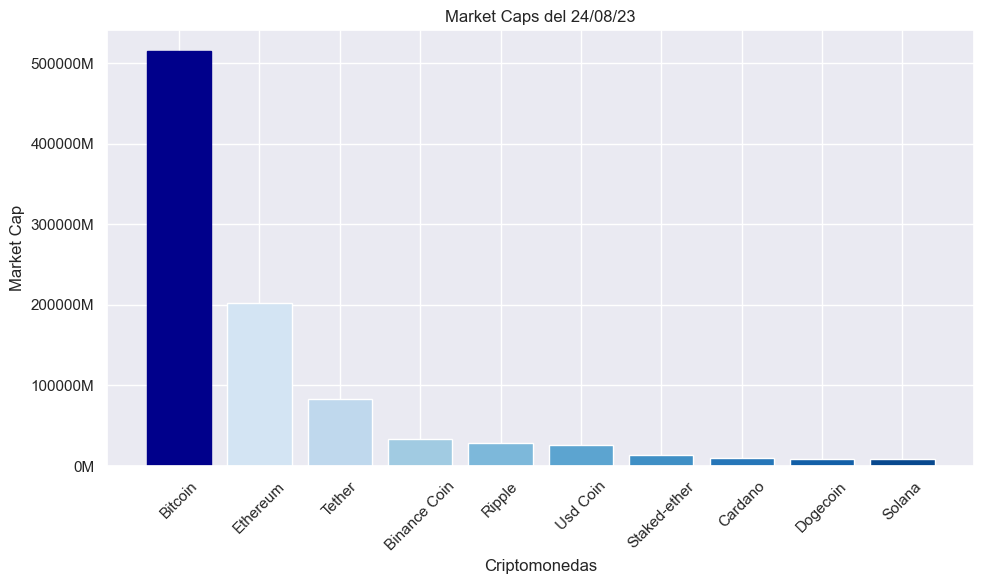

In [460]:
# Lista de dataframes de criptomonedas
criptos_dataframes = [bitcoin, ethereum, tether, binancecoin, ripple, usdcoin, stakedether, cardano, dogecoin, solana]

# Nombres de las criptomonedas (nombres de los dataframes)
criptos_names = ['Bitcoin', 'Ethereum', 'Tether', 'Binance Coin', 'Ripple', 'Usd Coin', 'Staked-ether', 'Cardano', 'Dogecoin', 'Solana']

# Lista para almacenar los últimos market cap correspondientes a la última fecha
ultimos_market_cap = []

# Obtener el valor de market_cap correspondiente a la última fecha de cada dataframe
for df in criptos_dataframes:
    ultimo_market_cap = df.loc[df['Fecha'].idxmax()]['market_caps']
    ultimos_market_cap.append(ultimo_market_cap)

# Crear un dataframe con los nombres de las criptomonedas y los últimos market cap
data = {'Criptomoneda': criptos_names, 'Ultimo Market Cap': ultimos_market_cap}
ultimos_market_cap_df = pd.DataFrame(data)

# Ordenar el dataframe por market cap de mayor a menor
ultimos_market_cap_df.sort_values(by='Ultimo Market Cap', inplace=True, ascending=False)

# Obtener los colores para las barras usando una paleta de colores
colors = sns.color_palette("Blues", n_colors=len(criptos_names))

# Graficar los últimos market cap en un gráfico de barras con colores distintos
plt.figure(figsize=(10, 6))
bars = plt.bar(ultimos_market_cap_df['Criptomoneda'], ultimos_market_cap_df['Ultimo Market Cap'], color=colors)
bars[0].set_color('darkblue')  # Cambiar el color de la primera barra

# Formatear etiquetas del eje Y en múltiplos de millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))

plt.xticks(rotation=45)
plt.xlabel('Criptomonedas')
plt.ylabel('Market Cap')
plt.title('Market Caps del 24/08/23')
plt.tight_layout()
plt.show()


Vemos una gran predominancia de Bitcoin por sobre las demás en el mercado de criptomonedas. En segundo lugar y con menos de market cap, sigue Ethereum.

### Bitcoin

In [280]:
bitcoin.describe()

,prices,market_caps,total_volumes
count,3649.00,3649.00,3649.00
mean,12435.98,231244655079.40,14562581081.25
std,15696.66,297749566809.01,18480588018.87
min,121.77,1420952396.00,0.00
25%,603.55,8195697095.94,274900590.57
50%,6626.04,114225251470.51,4322794079.14
75%,19151.13,362303884192.01,24707058599.12
max,67617.02,1278797895528.36,178894068361.35


A simple vista vemos una gran dispersión en los datos, identificando la volatilidad característica de las criptomonedas.

Hacemos una función para graficar gráficos de caja de nuestras tres variables, para los últimos dos años. Nos sirve para todas las criptomonedas

In [380]:
# Grafico de cajas con datos de dos años atras

def plot_boxplots(dataframe, title):
    # Calcular la fecha actual y la fecha hace 'years' años
    current_date = pd.to_datetime(dataframe['Fecha']).max()
    start_date = current_date - pd.DateOffset(years = 2)

    # Filtrar el DataFrame para los datos de los últimos 'years' años
    dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]

    # Crear una figura con tres subplots en una fila
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    # Variables a graficar
    columns_to_plot = ['prices', 'market_caps', 'total_volumes']

    # Definir el formateador de etiquetas del eje y
    def millions_formatter(x, pos):
        if x < 10e6:
            return f'{x:.2f}'
        else:
            return f'{x / 1e6:.0f}M'

    # Generar los gráficos de caja en cada subplot
    for i, column_name in enumerate(columns_to_plot):
        ax = axes[i]
        ax.boxplot(dataframe_filtered[column_name])
        ax.set_title(column_name)
        # Aplicar el formateador de etiquetas al eje y
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

    # Ajustar el espacio entre subplots
    plt.tight_layout()

    fig.suptitle(title, fontsize=20)

    # Espacio entre el título y los subplots
    plt.subplots_adjust(top=0.85)

    plt.show()

Vamos a hacer un grafico de tendencia normalizando los tres valores para poder visualizarlos juntos y como nuestro cliente es un inversor de mediano plazo y largo plazo, vamos a agrupar datos cada tres meses. De nada nos sirven los datos diarios.

In [414]:
def plot_trend(dataframe, title):
    # Convertir la columna 'Fecha' a tipo datetime
    dataframe['Fecha'] = pd.to_datetime(dataframe['Fecha'])

    # Normalizar los datos (excepto la columna 'Fecha') para que los podamos analizar en el mismo gráfico
    scaler = MinMaxScaler()
    dataframe_normalizado = dataframe.copy()
    dataframe_normalizado[dataframe.columns[1:]] = scaler.fit_transform(dataframe[dataframe.columns[1:]])

    # Agrupar trimestralmente y hacerlo por agregación
    dataframe_trimestral = dataframe_normalizado.resample('3M', on='Fecha').agg({
        'prices': 'mean',
        'market_caps': 'mean',
        'total_volumes': 'mean'
    }).reset_index()

    # Establecer los márgenes de la figura
    plt.figure(figsize=(10, 8))
    palette = sns.color_palette("muted", len(dataframe_trimestral.columns[1:]))

    # Graficar cada uno de los features
    for i, columna in reversed(list(enumerate(dataframe_trimestral.columns[1:]))):
        sns.lineplot(data=dataframe_trimestral, x='Fecha', y=columna, markersize=6,
                     linewidth=2, label=columna, color=palette[i])

    # Calcular la línea de tendencia para 'prices' utilizando regresión lineal
    x_values = range(len(dataframe_trimestral))
    y_values = dataframe_trimestral['prices']
    model = LinearRegression()
    model.fit([[x] for x in x_values], y_values)
    trend_line = model.predict([[x] for x in x_values])

    # Tramar la línea de tendencia para 'prices' con línea punteada
    plt.plot(dataframe_trimestral['Fecha'], trend_line, label='Línea de Tendencia de prices',
             linestyle='dashed', color='blue')

    # Agregar título y etiquetas de los ejes
    plt.suptitle(title, fontsize=20)  # Título principal
    plt.title('Tendencia trimestral normalizada', fontsize=12)  # Título secundario
    plt.xlabel('Fecha')
    plt.ylabel('Valores Normalizados')

    # Mostrar leyenda
    plt.legend(fontsize='small')

    # Rotar las fechas en el eje x para que sean legibles
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

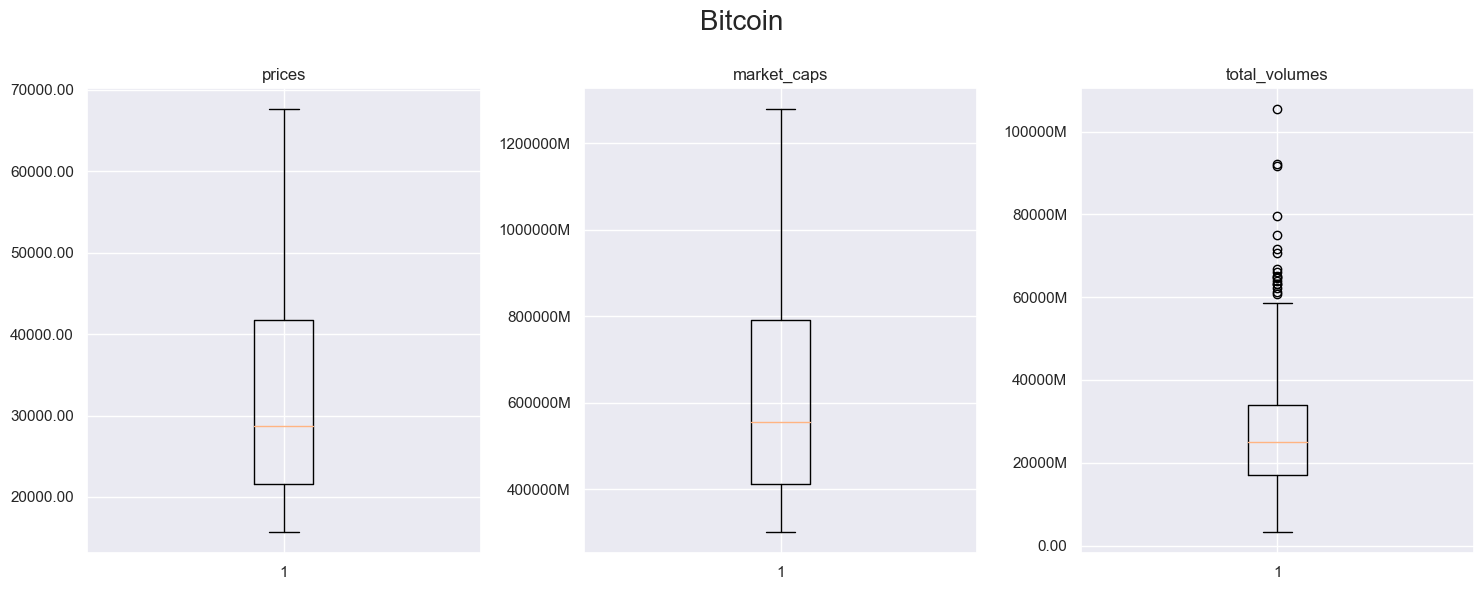

In [412]:
# Gráfico de caja para Bitcoin
plot_boxplots(bitcoin, 'Bitcoin')

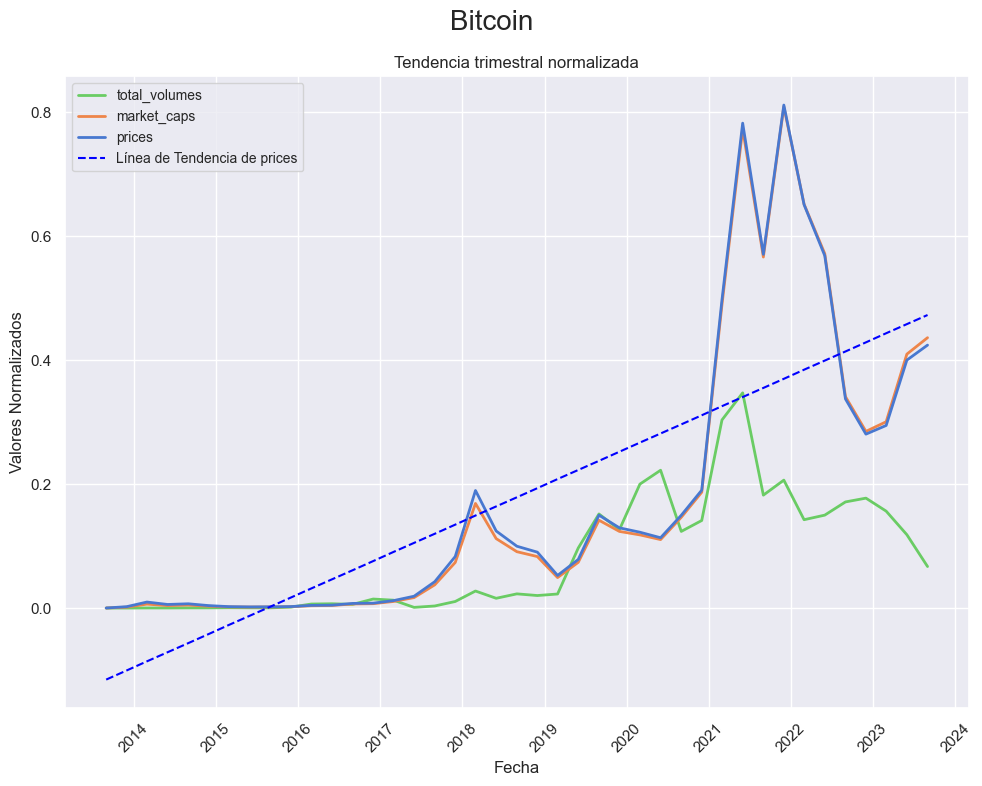

In [415]:
# Gráfico de tendencia para Bitcoin
plot_trend(bitcoin, 'Bitcoin')

### Ethereum

In [418]:
ethereum.describe()

,prices,market_caps,total_volumes
count,2939.00,2939.00,2939.00
mean,882.85,102389143479.01,9335384278.42
std,1094.49,130562060652.72,12354609923.83
min,0.43,0.00,87074.80
25%,126.99,13643385672.31,386897331.91
50%,301.37,29536454012.04,6170212643.31
75%,1571.81,188795435379.59,13606179966.50
max,4815.00,571665766496.09,140906534190.59


In [ ]:
Al igual que bitcoin, 

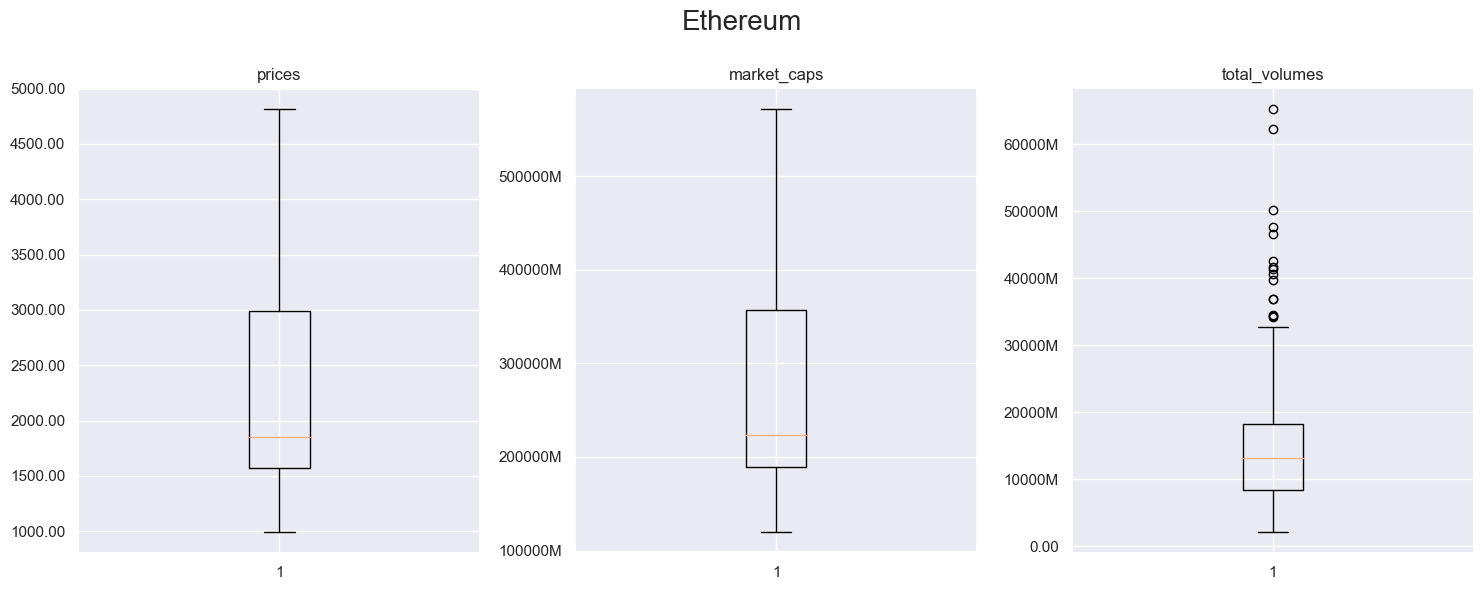

In [417]:
# Gráfico de caja para Ethereum
plot_boxplots(ethereum, 'Ethereum')

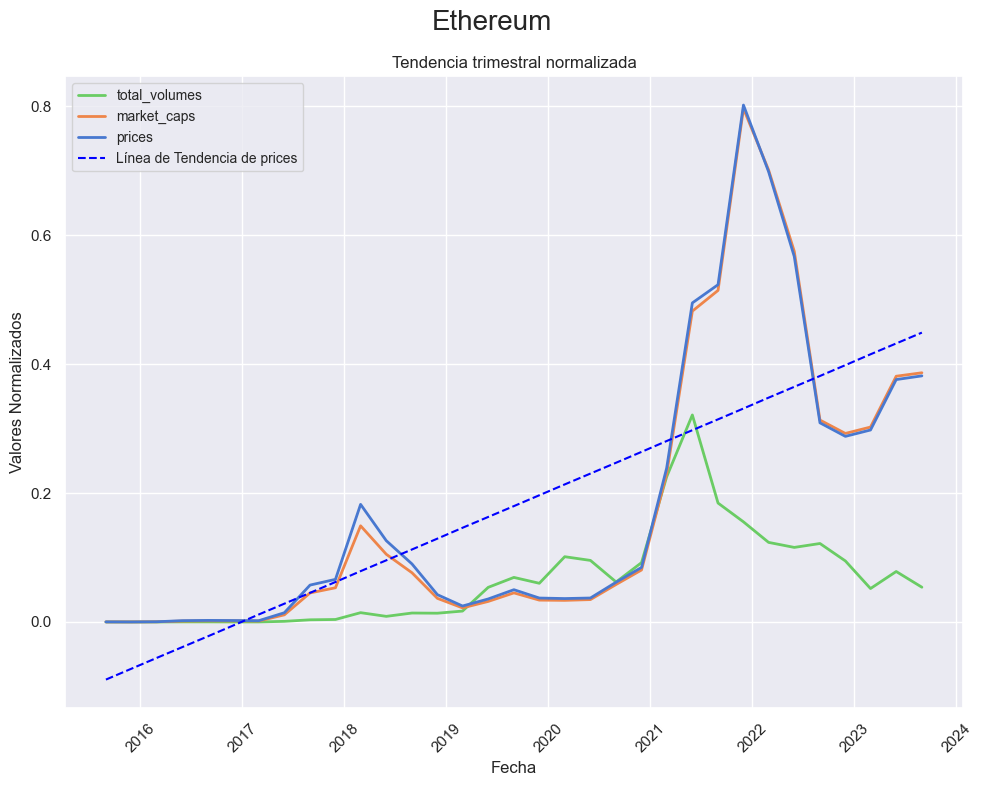

In [416]:
# Gráfico de tendencia para Ethereum
plot_trend(ethereum, 'Ethereum')

Como vemos, Ethereum tiene un compartamiento muy similar a Bitcoin y se ha visto afectada en los mismos períodos. La tendencia alcista del market cap es un buen síntoma.

### Tether

In [393]:
tether.describe()

,prices,market_caps,total_volumes
count,3080.00,3080.00,3080.00
mean,1.00,23192779376.72,26825526474.34
std,0.02,31443835095.08,41138976807.99
min,0.57,144046.00,0.00
25%,1.00,57908758.73,2578240.00
50%,1.00,2818892360.09,16322692804.08
75%,1.00,62653906352.68,42981570953.59
max,1.32,83895071911.89,926767674515.14


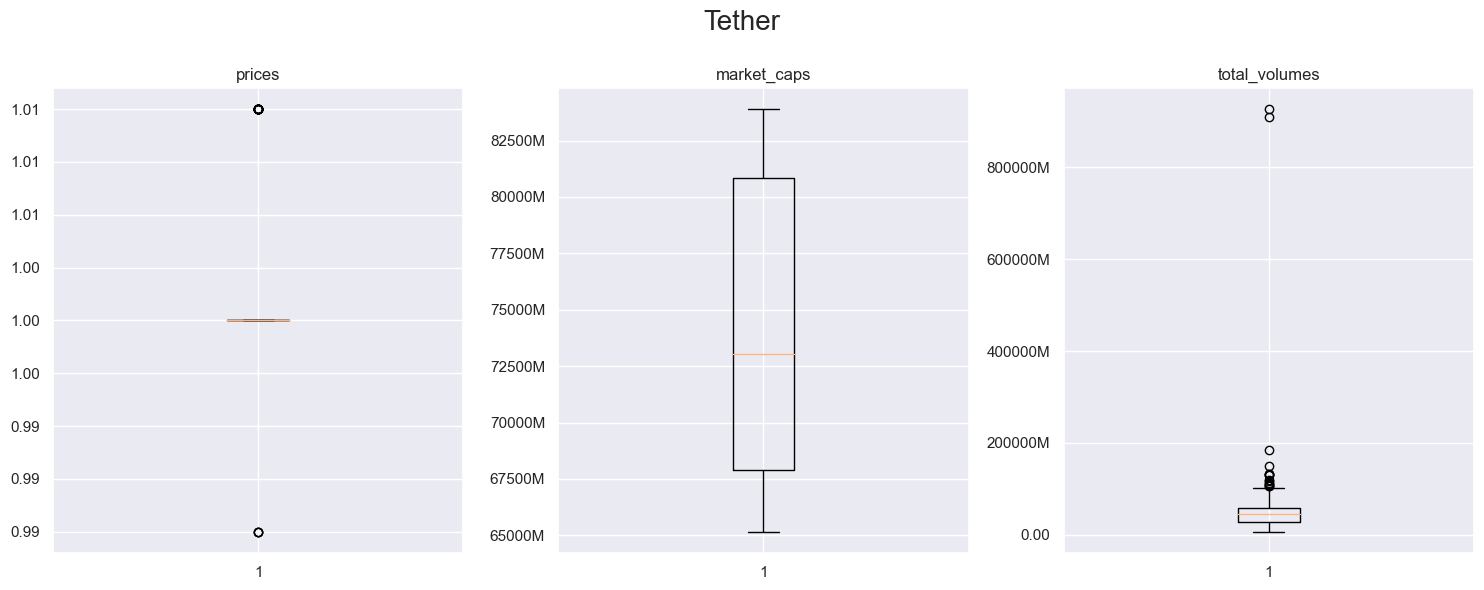

In [419]:
plot_boxplots(tether, 'Tether')

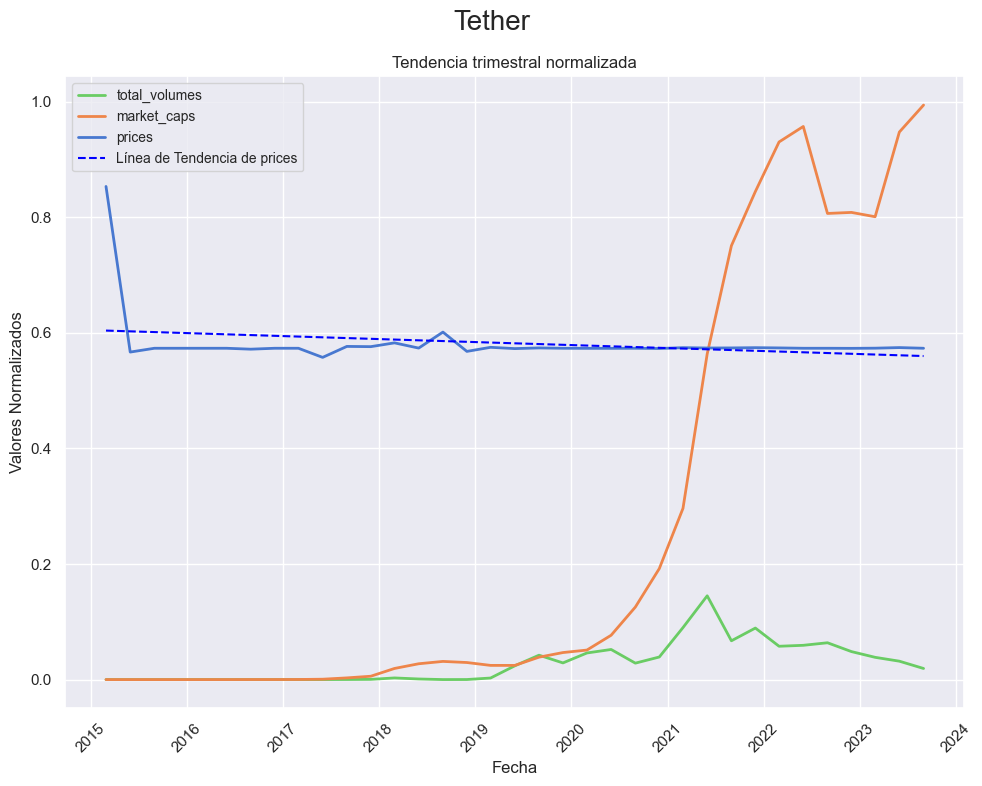

In [420]:
plot_trend(tether, 'Tether')

Vemos que Tether al comienzo de su ciclo de vida tuvo un precio superior al dolar pero luego se estabilizó en 1 USD. Por el gráfico de caja hay variaciones de un 1% los últimos dos años pero son valores atípicos, por lo que es muy estable. Podría representar nuestro fondo de seguridad en cripto, cuando no queremos invertir. Vemos que su market cap tuvo una corrida muy grande en la pandemia pero ha logrado mantenerse.

### Binance Coin

In [421]:
binancecoin.describe()

,prices,market_caps,total_volumes
count,2167.00,2167.00,2167.00
mean,158.45,25274460181.90,895409275.62
std,178.06,28994337486.56,1526146221.46
min,0.04,3981769.72,0.72
25%,14.39,1901311387.44,132359950.21
50%,29.12,4358178089.79,360614333.51
75%,303.61,48315544255.76,1089828758.94
max,675.10,110441230385.45,22103516567.71


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


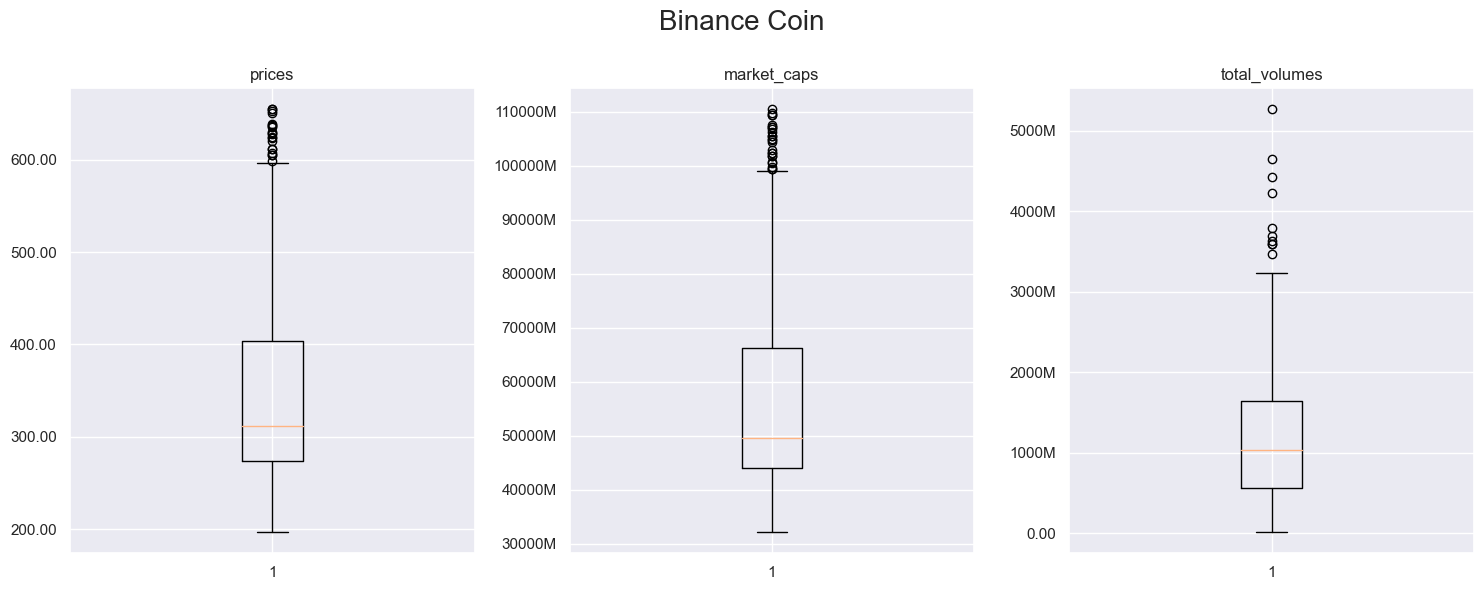

In [422]:
plot_boxplots(binancecoin, 'Binance Coin')

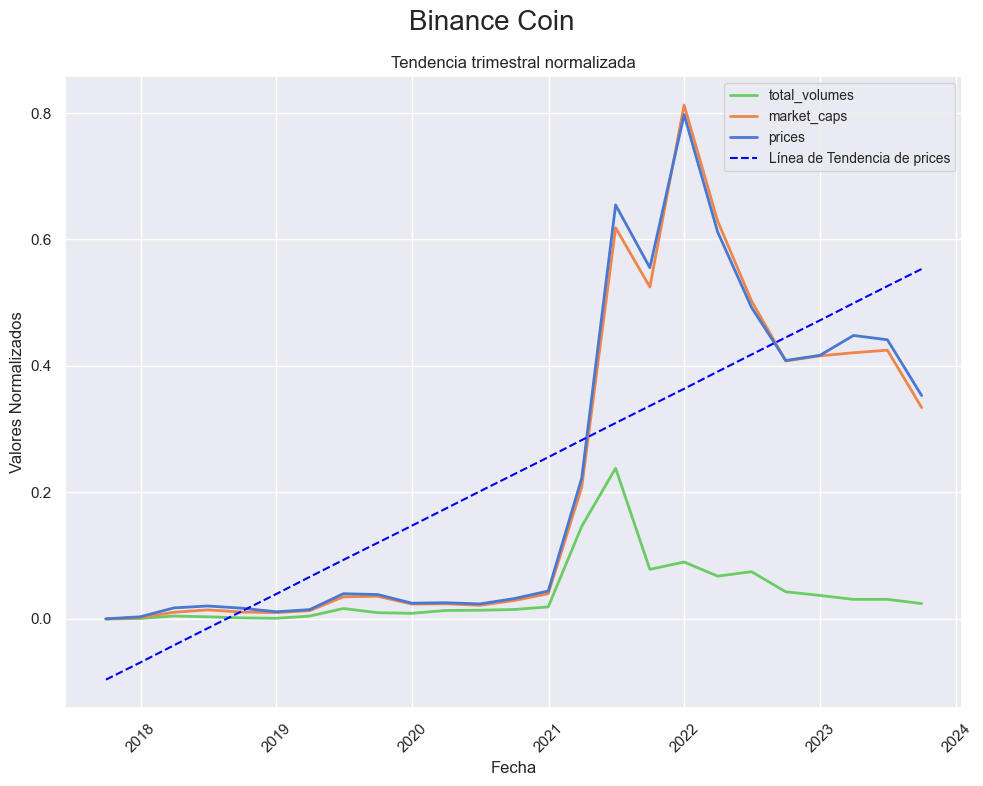

In [423]:
plot_trend(binancecoin, 'Binance Coin')

### Ripple

In [425]:
ripple.describe()

,prices,market_caps,total_volumes
count,3645.00,3645.00,3645.00
mean,0.32,14104902514.56,1527250047.12
std,0.36,15951691690.50,3051790877.25
min,0.00,21944813.43,0.00
25%,0.01,253609873.07,795100.00
50%,0.25,10924989830.67,547950108.43
75%,0.46,20405940224.79,1862120141.68
max,3.40,131653046805.29,62468131981.57


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


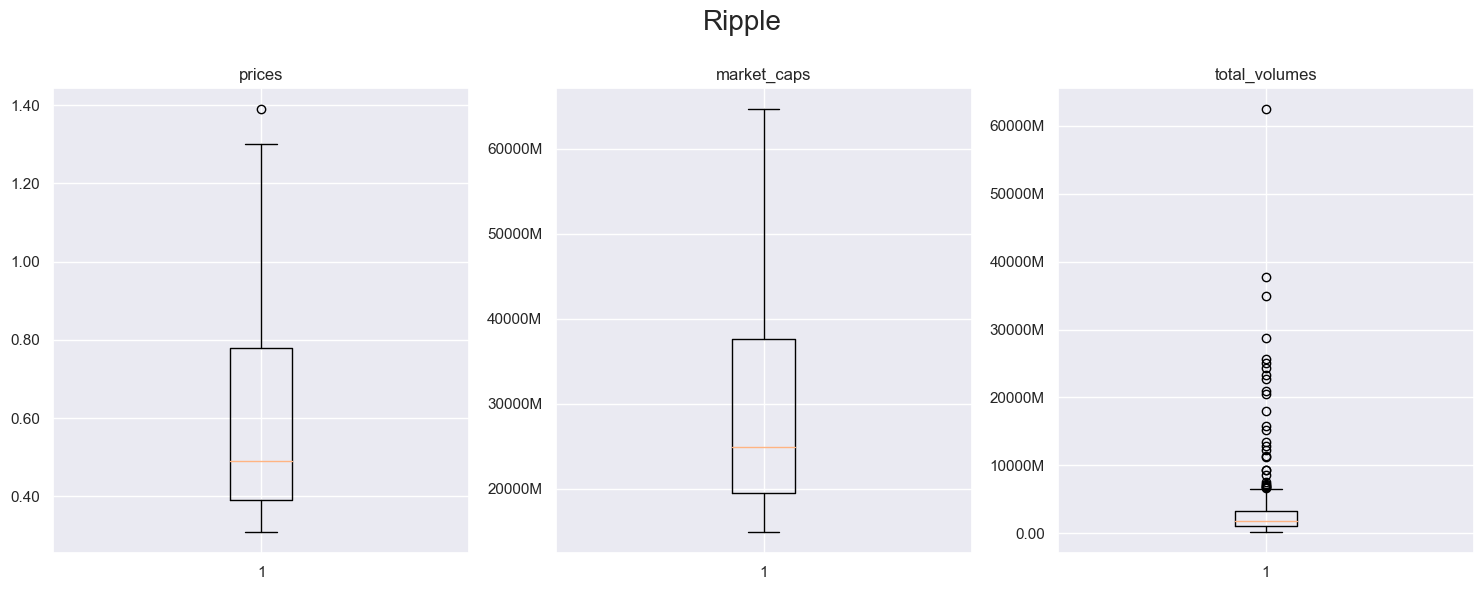

In [426]:
plot_boxplots(ripple, 'Ripple')

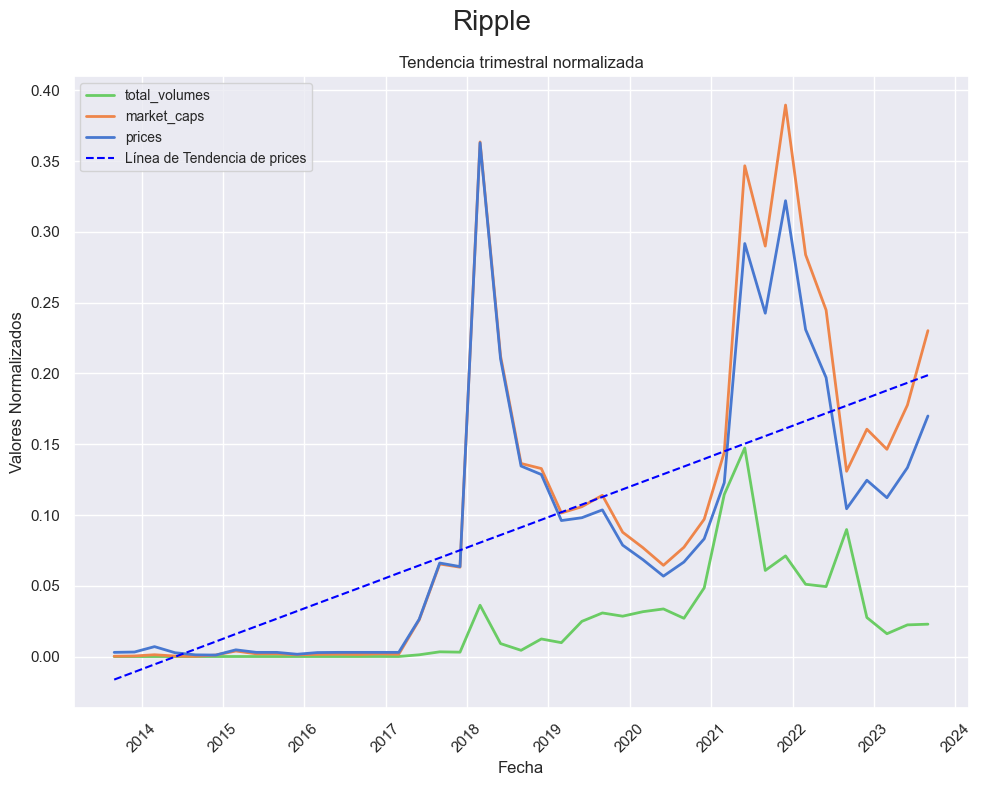

In [427]:
plot_trend(ripple, 'Ripple')

### USD Coin

In [428]:
usdcoin.describe()

,prices,market_caps,total_volumes
count,1785.00,1785.00,1785.00
mean,1.00,19590368995.91,2468585334.48
std,0.00,20325362992.19,3425773303.80
min,0.97,0.00,20254.71
25%,1.00,461348398.66,462375518.13
50%,1.00,9441975283.50,1985801225.22
75%,1.00,41466978388.10,3635184947.83
max,1.04,56159787682.47,110291776337.19


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


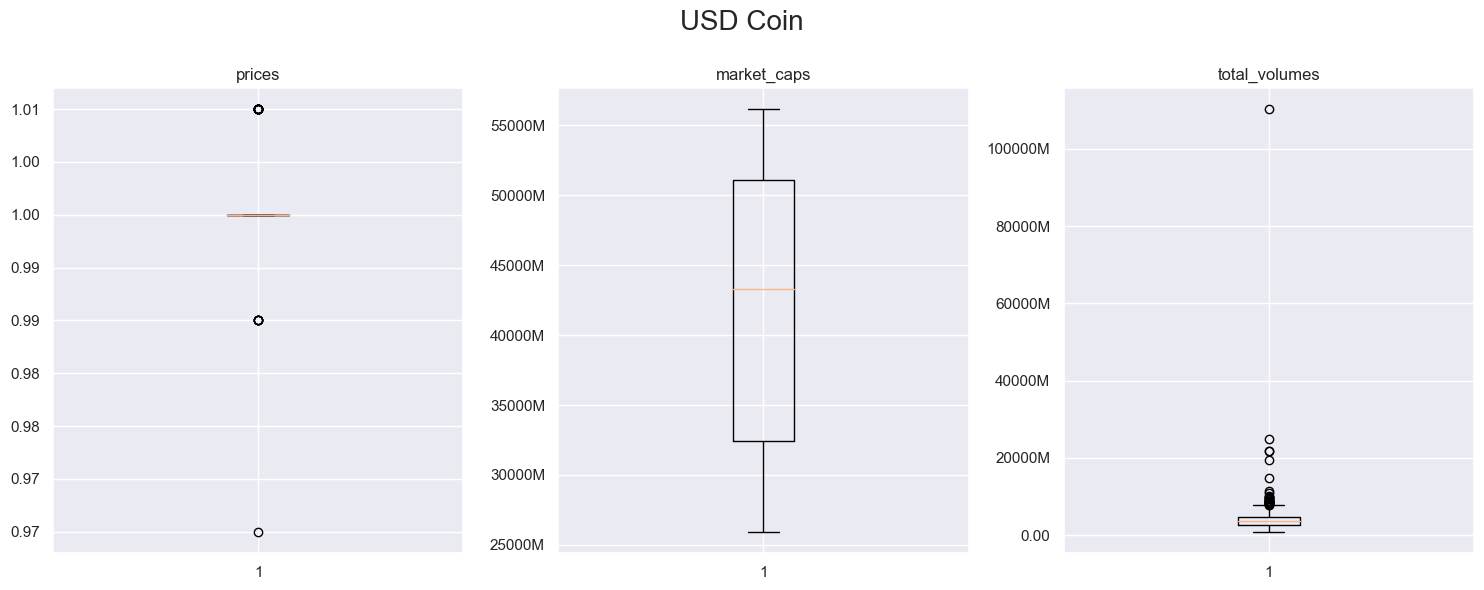

In [429]:
plot_boxplots(usdcoin, 'USD Coin')

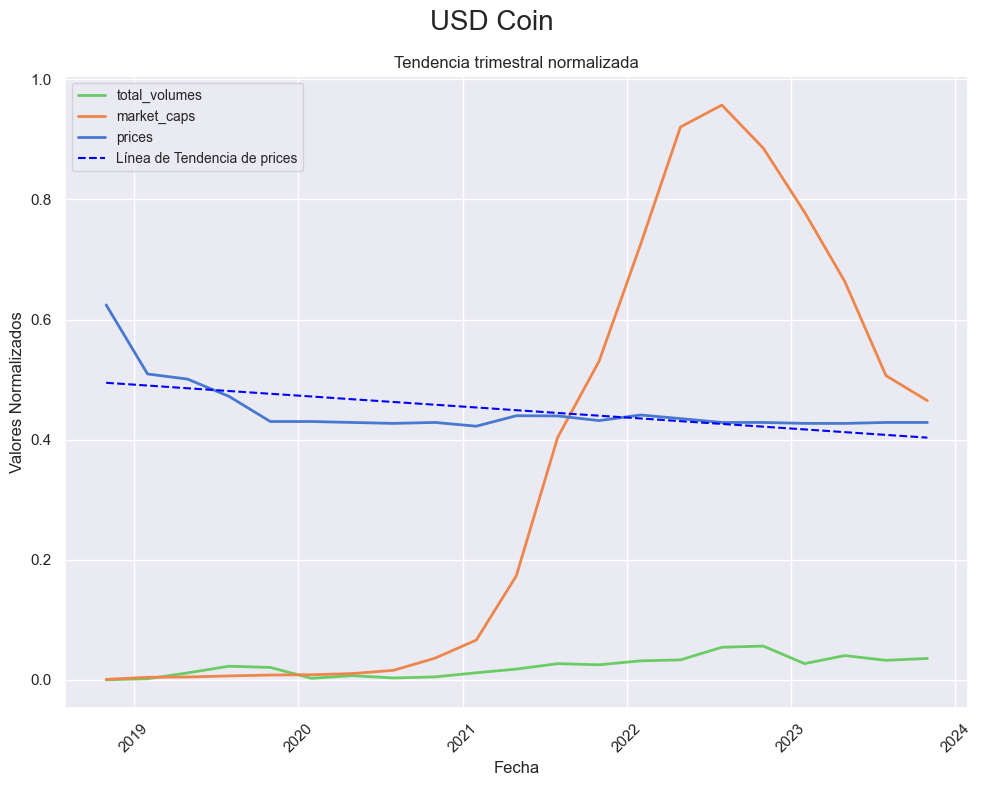

In [433]:
plot_trend(usdcoin, 'USD Coin')

Analizando las gráficas anteriores, entre las stable coins, USD Coin es una buena alternativa a Tether. Es una cripto más nueva por lo que es más volatil, pero la tendencia nos anuncia una gran estabilidad. El market cap llego a su maximo el año pasado y hubo una gran caida, ahora esta buscando estabilidad en un valor medio.

In [434]:
stakedether.describe()

,prices,market_caps,total_volumes
count,976.00,976.00,976.00
mean,2197.03,6146171781.98,22930038.10
std,917.95,4099398024.41,52949143.75
min,596.77,0.00,62.18
25%,1564.64,3055184707.04,3562995.38
50%,1866.78,5959275562.56,10235729.76
75%,2859.67,8366581691.17,22791079.28
max,4775.45,15394436577.33,834985189.58


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


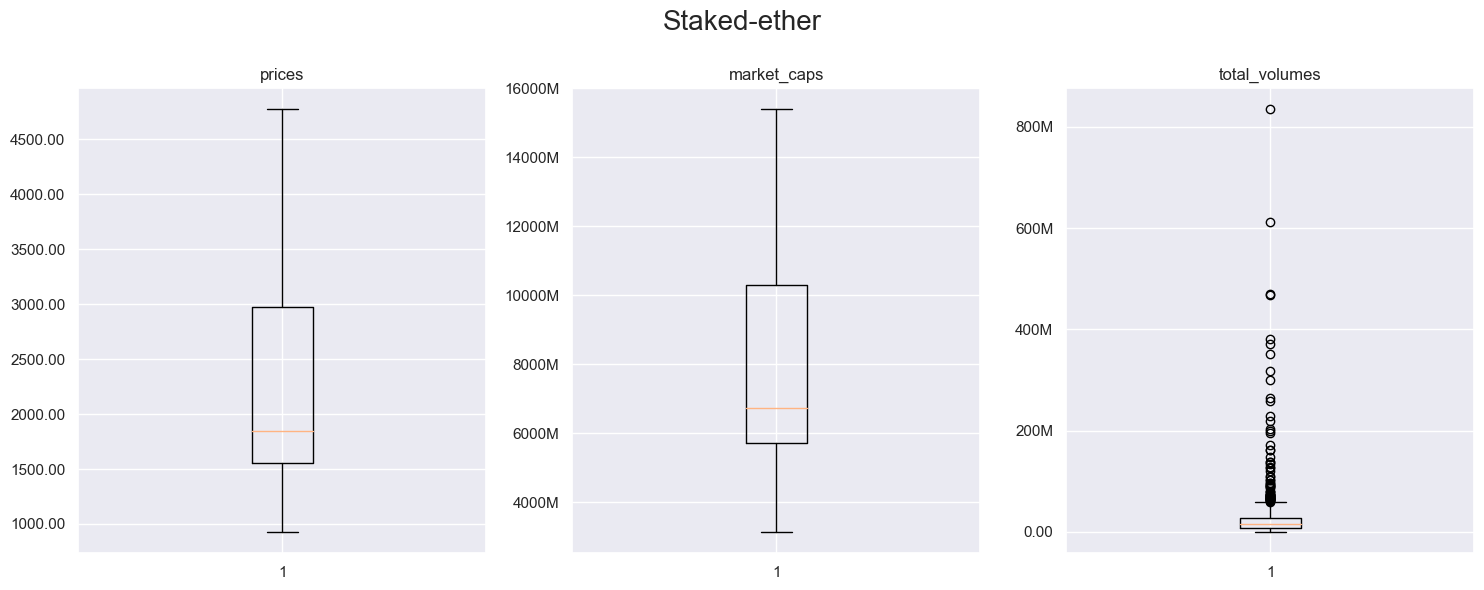

In [435]:
plot_boxplots(stakedether, 'Staked-ether')

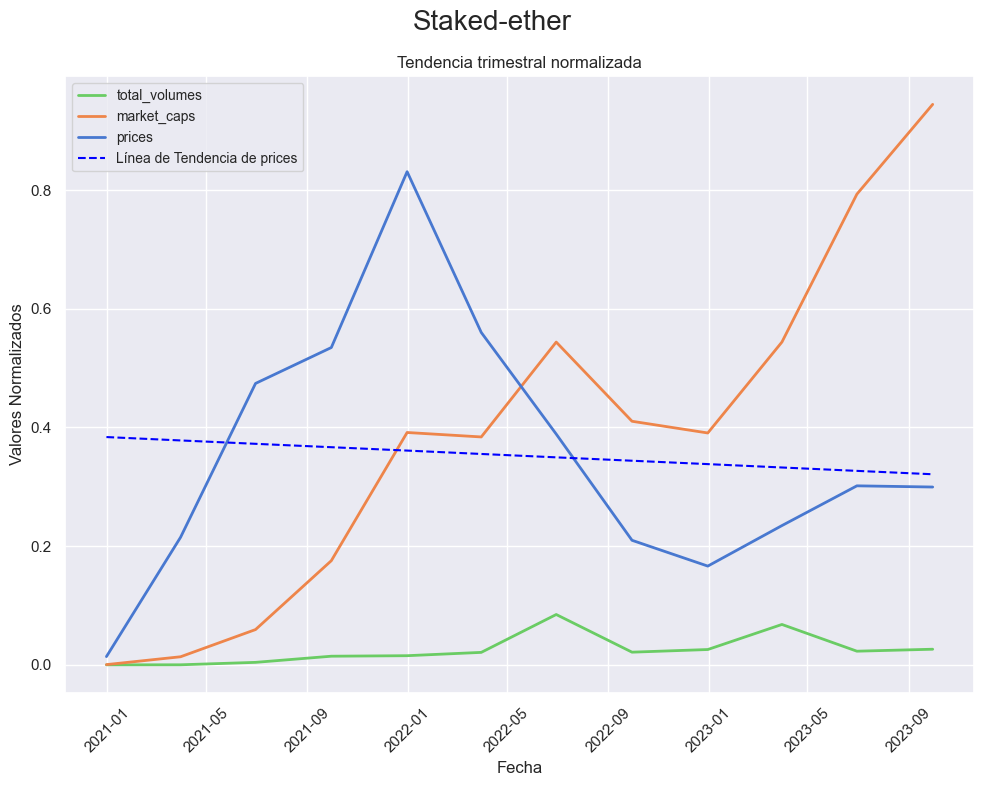

In [436]:
plot_trend(stakedether, 'Staked-ether')

Es una criptomoneda bastante nueva, su market cap está en su máximo histórico con grandes expectativas, el mercado está eligiendo esta criptomoneda.
Debido a su protocolo de consenso Proof of Stake, que busca reemplazar a Proof of Work iniciado por Bitcoin, tiene posibilidades de crecimiento muy grandes.

### Cardano

In [438]:
cardano.describe()

,prices,market_caps,total_volumes
count,2137.00,2137.00,2137.00
mean,0.47,15035030557.74,955798222.95
std,0.59,18930894669.13,1770668734.52
min,0.02,552780115.69,1729975.27
25%,0.07,2236459283.82,106175294.68
50%,0.25,6776976218.18,283365264.52
75%,0.52,16997573338.70,844199808.76
max,2.97,95003730487.98,17436012662.32


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


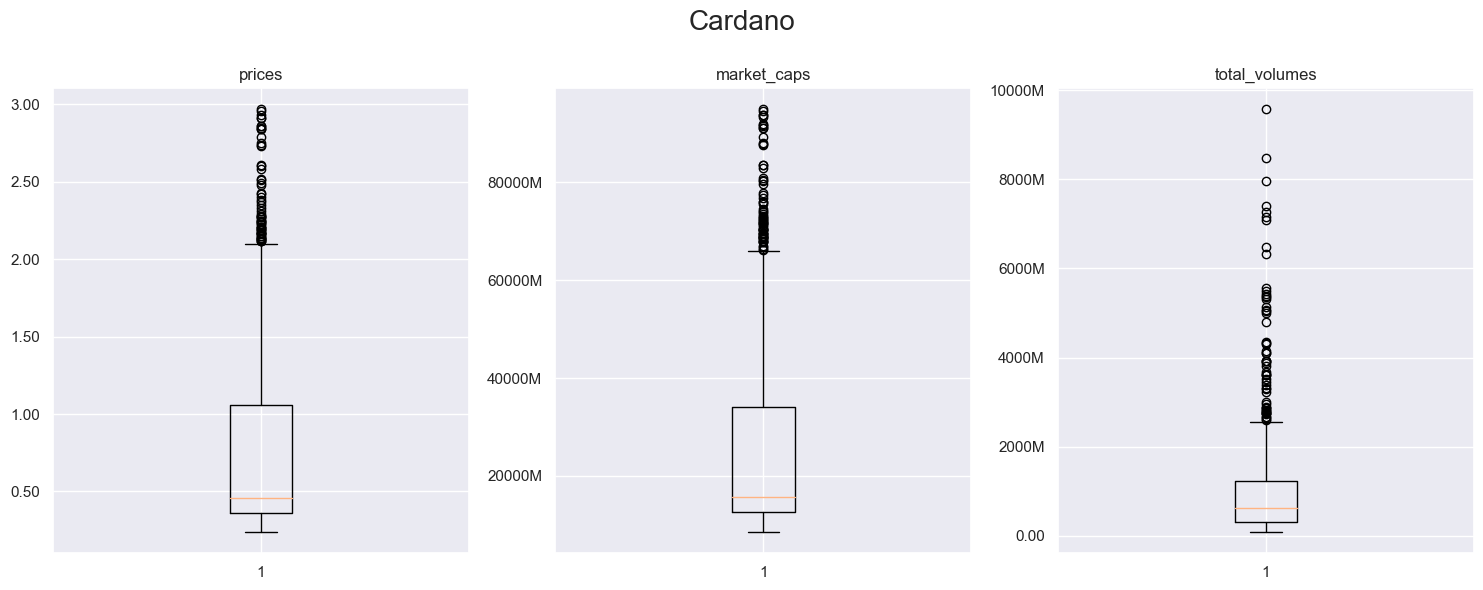

In [439]:
plot_boxplots(cardano, 'Cardano')

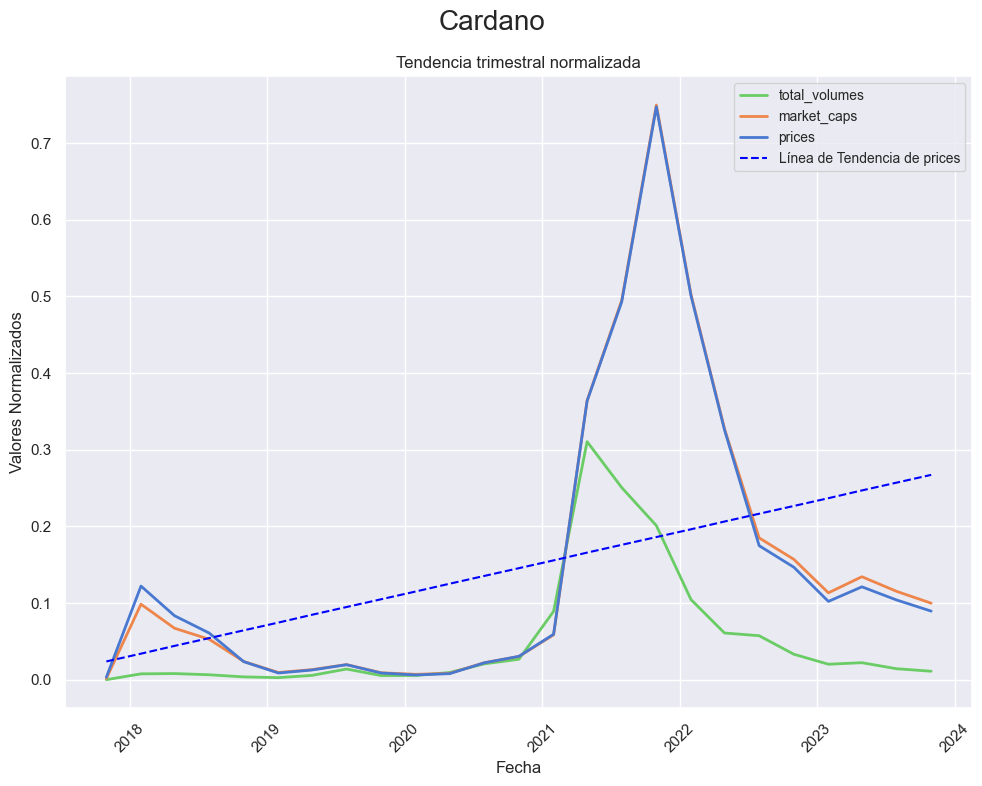

In [440]:
plot_trend(cardano, 'Cardano')

### Dogecoin

In [441]:
dogecoin.describe()

,prices,market_caps,total_volumes
count,3537.00,3537.00,3537.00
mean,0.04,4965304811.06,586202754.44
std,0.08,10253184252.64,2517569519.40
min,0.00,1619159.00,0.00
25%,0.00,24876351.90,301520.98
50%,0.00,300430049.20,30622949.65
75%,0.06,7507812667.99,276225702.31
max,0.68,88794768977.21,50960650646.95


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


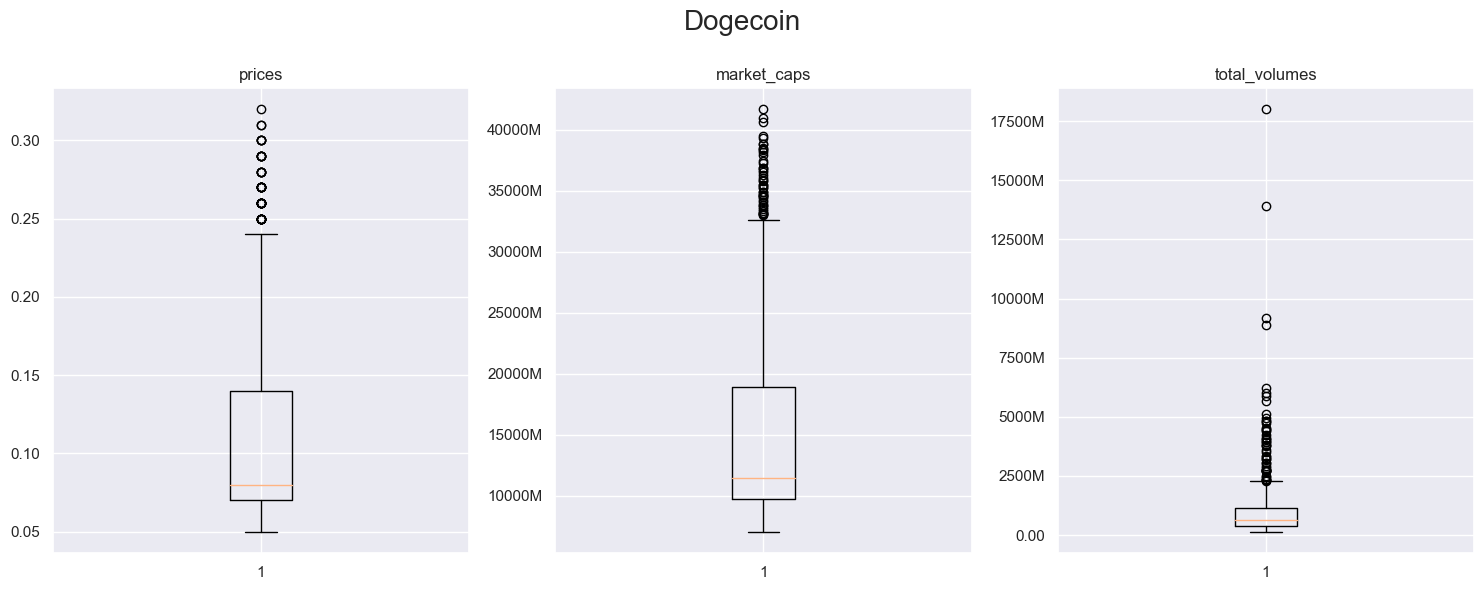

In [442]:
plot_boxplots(dogecoin, 'Dogecoin')

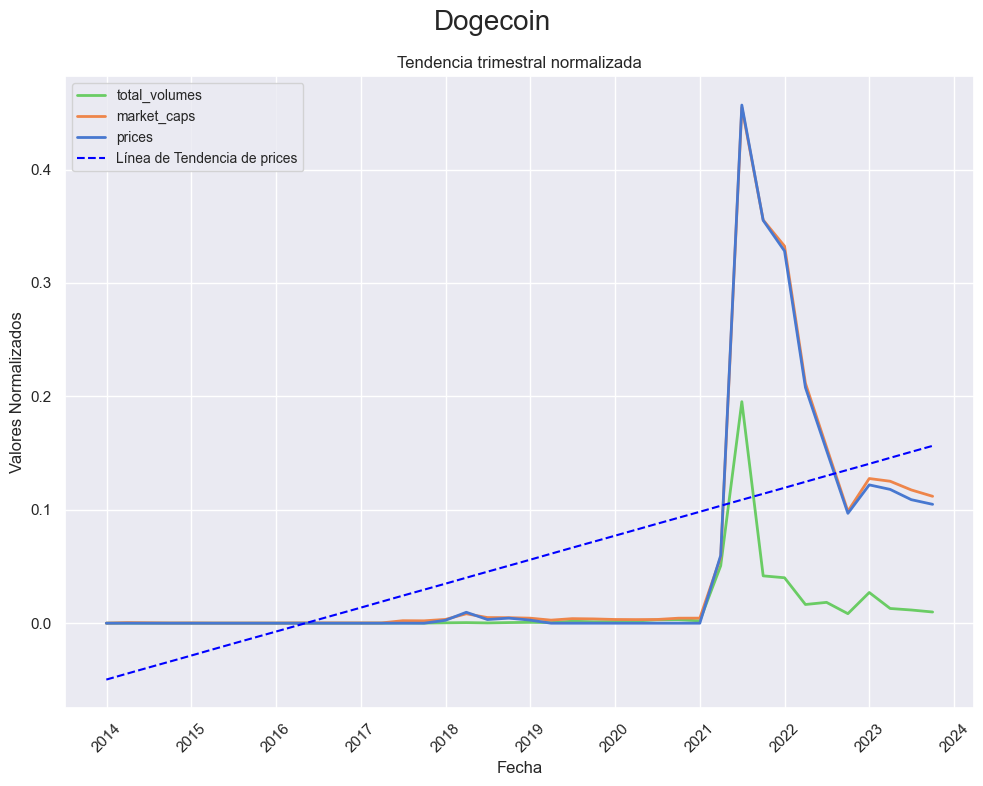

In [443]:
plot_trend(dogecoin, 'Dogecoin')

### Solana

In [444]:
solana.describe()

,prices,market_caps,total_volumes
count,1231.00,1231.00,1231.00
mean,45.38,14308314203.27,978523201.11
std,56.12,17125010630.02,1285858364.67
min,0.51,4171226.30,548910.11
25%,8.51,2241922748.52,114678444.25
50%,24.38,8762954564.82,565022391.07
75%,43.98,14482581252.80,1355166848.48
max,259.24,77427308372.13,16149087501.30


C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\3496440760.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  dataframe_filtered = dataframe[dataframe['Fecha'] >= start_date]


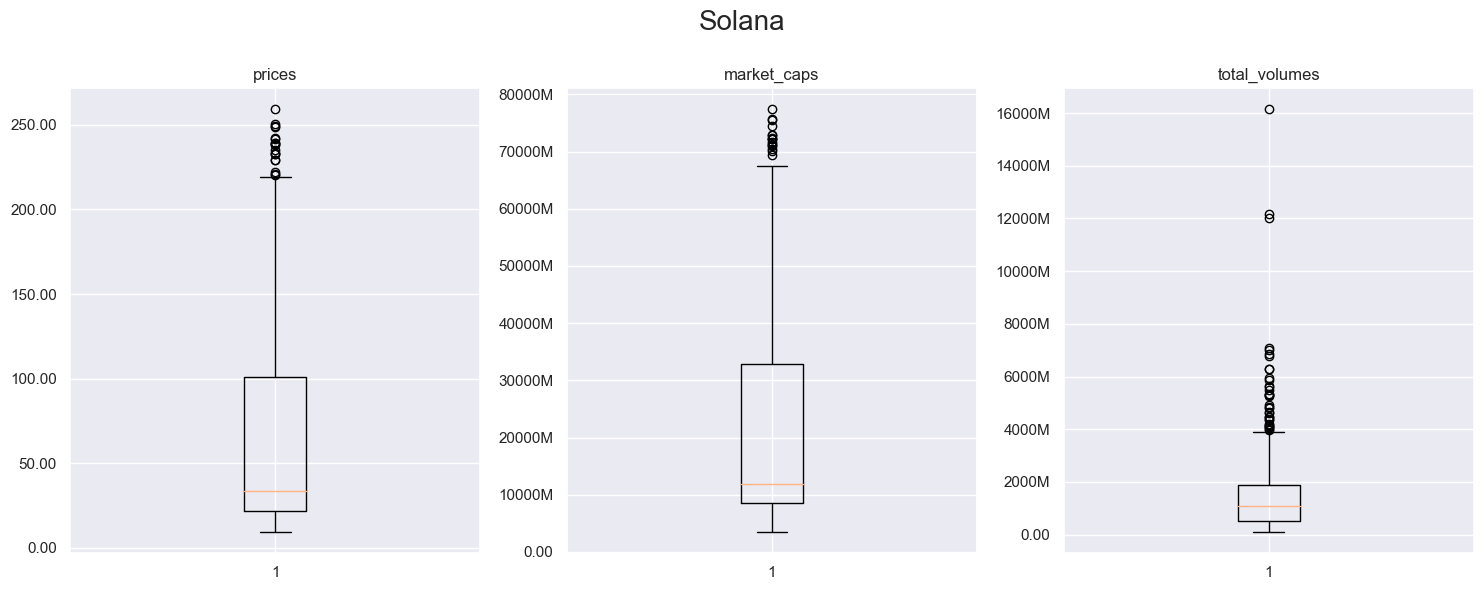

In [445]:
plot_boxplots(solana, 'Solana')

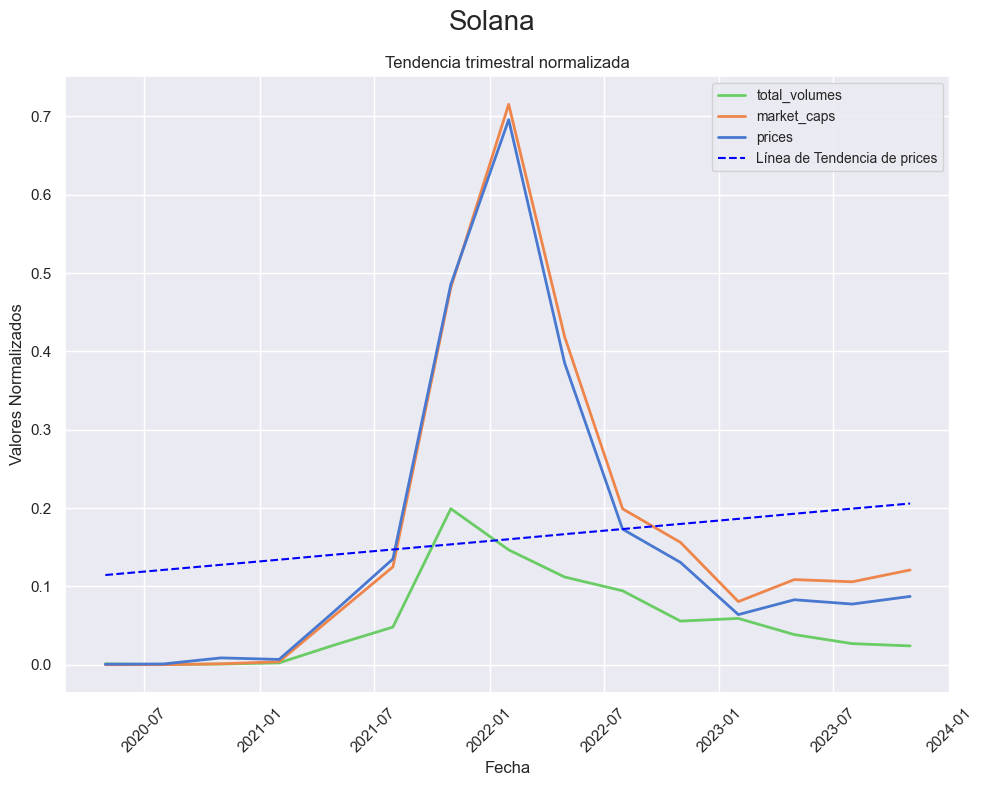

In [446]:
plot_trend(solana, 'Solana')

In [461]:
bitcoin

,Fecha,prices,market_caps,total_volumes,Criptomoneda
0,2013-08-27,125.67,1459371151.00,0.00,Criptomoneda 1
1,2013-08-28,123.02,1429111038.00,0.00,Criptomoneda 1
2,2013-08-29,123.44,1434594992.00,0.00,Criptomoneda 1
3,2013-08-30,129.20,1502172870.00,0.00,Criptomoneda 1
4,2013-08-31,137.76,1602407100.00,0.00,Criptomoneda 1
...,...,...,...,...,...
3644,2023-08-20,26104.78,508087686822.70,3355038748.98,Criptomoneda 1
3645,2023-08-21,26160.70,509078930366.09,8304370131.83,Criptomoneda 1
3646,2023-08-22,26119.01,508491920831.35,9377753161.45,Criptomoneda 1
3647,2023-08-23,26033.68,506356213378.18,13702941053.02,Criptomoneda 1


Matriz de correlación entre criptomonedas

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_804\2927030076.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


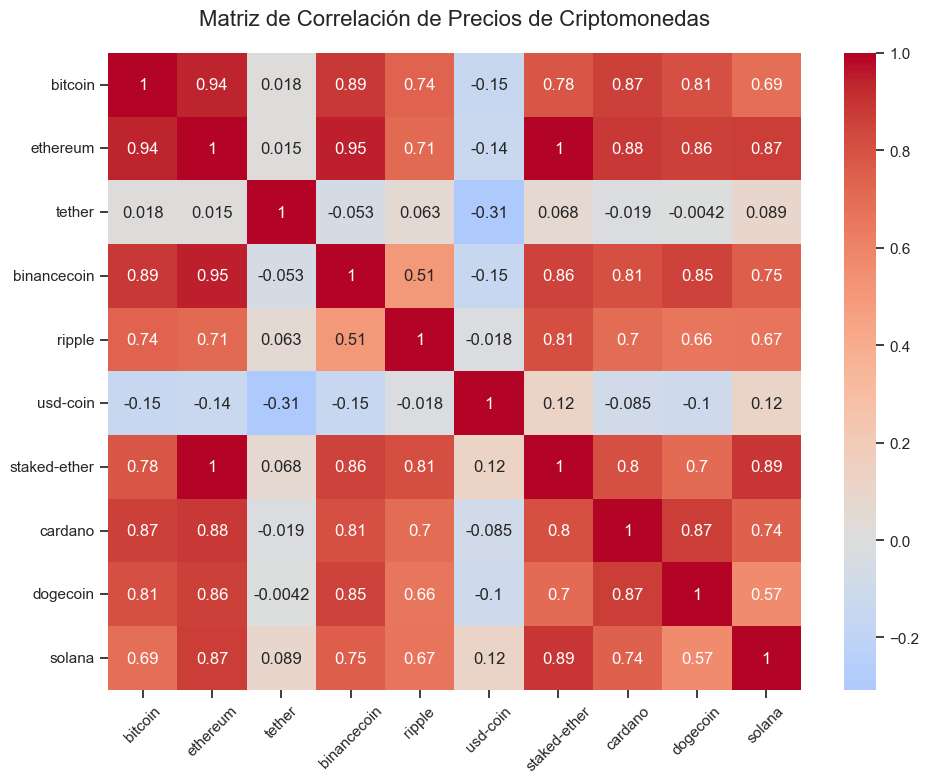

In [473]:
# Merge de los dataframes por la columna 'Fecha' usando join externo (outer join)
merged_df = criptos_dataframes[0][['Fecha', 'prices']]
merged_df = merged_df.rename(columns={'prices': cripto_ids[0]})
for i, df in enumerate(criptos_dataframes[1:]):
    merged_df = pd.merge(merged_df, df[['Fecha', 'prices']], on='Fecha', how='outer')
    merged_df = merged_df.rename(columns={'prices': cripto_ids[i + 1]})

# Calcular la matriz de correlación
correlation_matrix = merged_df.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Establecer etiquetas en los ejes X e Y
plt.xticks(rotation=45)
plt.yticks(rotation=0)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.title('Matriz de Correlación de Precios de Criptomonedas', fontsize = 16, pad = 20)
plt.tight_layout()
plt.show()


Como vemos hay una fuerte correlación positiva entre las criptomonedas, excepto las stable coins (Tether y USD-Coin). Dogecoin es el precio de la moneda menos correlacionado con los demás, puede deberse a que esta cripto nació como un meme y su mercado es muy influenciado por mensajes de Twitter de Elon Musk, perdiendo credibilidad y seriedad.

### KPIs

Nuestro cliente es un inversor local que busca resguardar su capital ante la crisis que vivimos en Argentina. Su actividad principal no es financiera, está buscando nuevos medios para colocar sus ganancias y no perder valor. No quiere hacer trading ni inversiones cortoplacistas. De aquí los siguientes KPIs:

#### KPI: Market cap interanual no disminuya un 30%

Métrica: Market cap interanual


Este indicador nos servirá para identificar riesgo y ponernos en alerta respecto a la criptomoneda respectiva. Por supuesto que deberemos analizar otros factores para tomar decisiones de vender o mantenernos con el activo, no es condición suficiente.

#### KPI: Promedio de volumen de 24 h mensual superior al 20% y precio estable

Métrica: Promedio de volumen de 24h mensual

Es un indicador que, sumado al precio de mercado en determinado momento, nos abre la posibilidad de comprar nuevas divisas de esa criptomoneda y capitalizar.

#### KPI: Duplicar las inversiones iniciales en criptomonedas en los próximos dos años.

Si la perspectiva de mercado es propicia y el cliente considera adecuado su ingreso al mercado cripto definiremos como objetivo este KPI el cual denotaría rendimientos y confianza en el mundo de las criptomonedas.

### Proof Of Stake

Proof of Stake (PoS) es un algoritmo de consenso utilizado en criptomonedas que permite validar las transacciones y generar nuevos bloques en la blockchain. A diferencia de Proof of Work (PoW), que utiliza la potencia de procesamiento de los mineros para validar las transacciones y resolver problemas matemáticos complejos, PoS utiliza la tenencia de monedas para validar las transacciones y generar nuevos bloques.
https://www.iebschool.com/blog/proof-of-stake-crypto-tecnologia/

De nuestras criptomonedas analizadas lo utilizan Ethereum (Staked-ether), Cardano, Binance Coin

Si tuviera que recomendar al cliente, diría que sus primeras inversiones de mediano y largo plaza las haga en blockchain que soporten el protocolo PoS. Parece ser que ha llegado para desterrar definitivamente a PoW y brinda muchas ventajas, citadas detalladamente en el enlace.